### Problem Statement
The  dataset consist of monthly totals of international airline passengers, between 1949 to 1960.
The objective of this analysis and modeling is to review time series theory.
We will be following ARIMA modeling procedure of AirPassengers dataset as follows:
perform exploratory data analysis
Decomposition of data
Test the stationarity


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('airline_passengers.csv')

In [3]:
data['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [4]:
data.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
data.dropna(axis=0,inplace=True)

In [6]:
data.isna().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
data['Month']=pd.to_datetime(data['Month'])

In [8]:
data['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [9]:
data.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [10]:
ts=data['Thousands of Passengers']

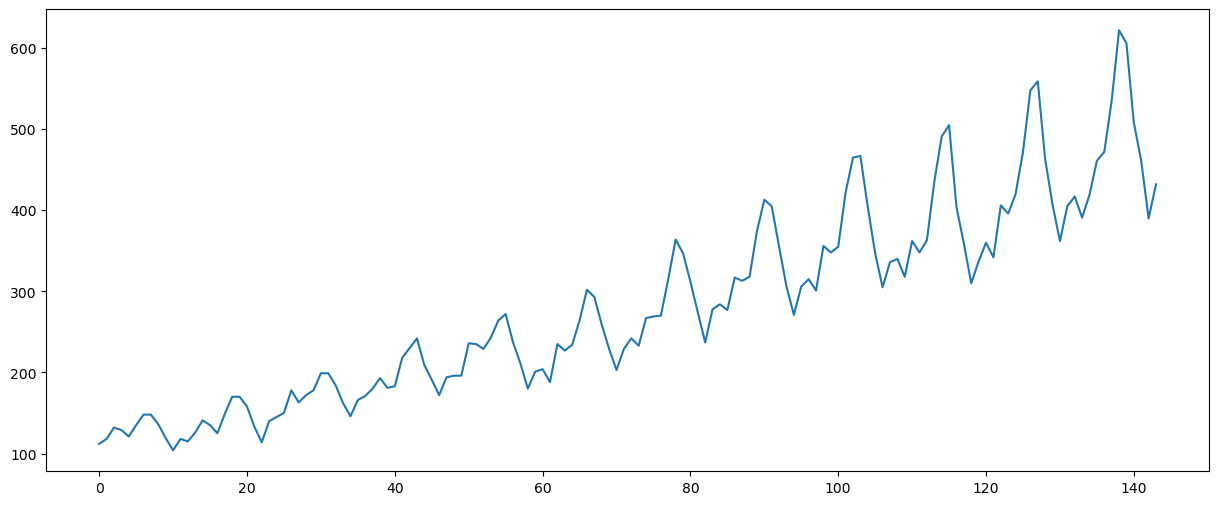

In [16]:
plt.plot(ts)

In [17]:
ts_log=np.log(ts)

In [18]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(window=52,center=False).mean()
    rolstd=timeseries.rolling(window=52,center=False).std()
    
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='Red',label='Rolling Mean')
    std=plt.plot(rolstd,color='green',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print('Result of Dickey-Fuler Test')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','No of observations used'])
    
    for key,value in dftest[4].items():
       dfoutput['critical value(%s)'%key]=value
    print(dfoutput)

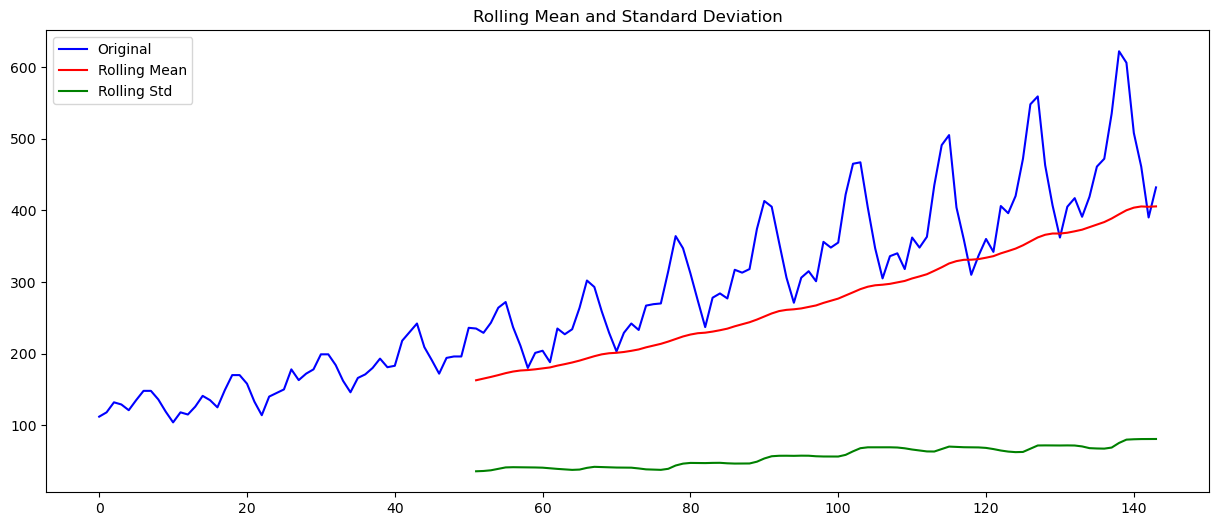

Result of Dickey-Fuler Test
Test Statistic               0.815369
p-value                      0.991880
#Lags used                  13.000000
No of observations used    130.000000
critical value(1%)          -3.481682
critical value(5%)          -2.884042
critical value(10%)         -2.578770
dtype: float64


In [19]:
test_stationarity(data['Thousands of Passengers'])

In [20]:
# We observe that the test Statistics is more than the critical value,and the moving average is not constant over time 
#so the Null Hypothesis of Dickey Fuller test cannot be rejected
#This Shows that the Timeseries is not stationary

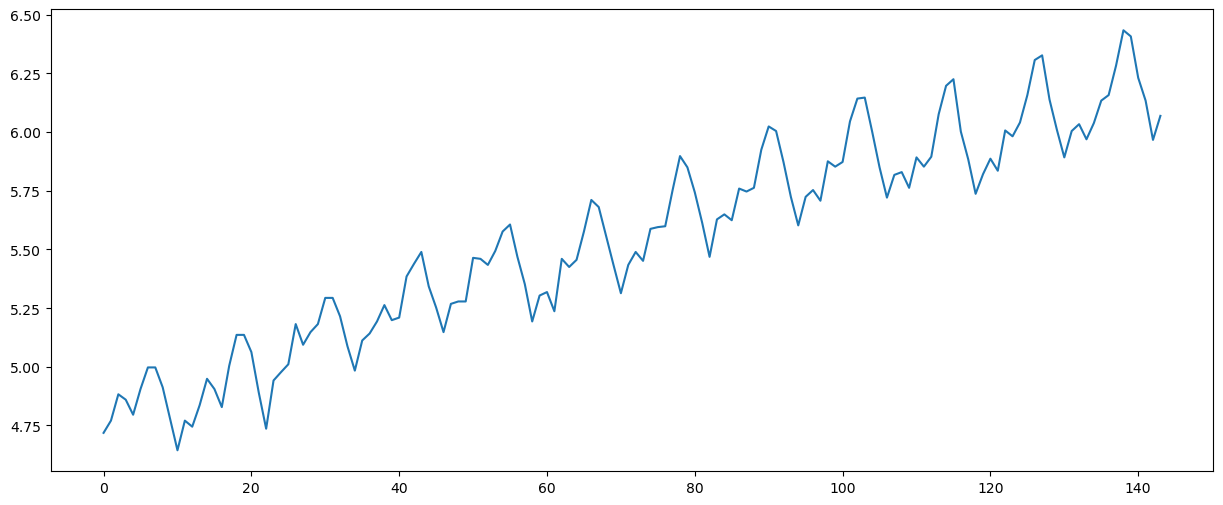

In [21]:
# Let us now plot the moving average

plt.plot(ts_log)

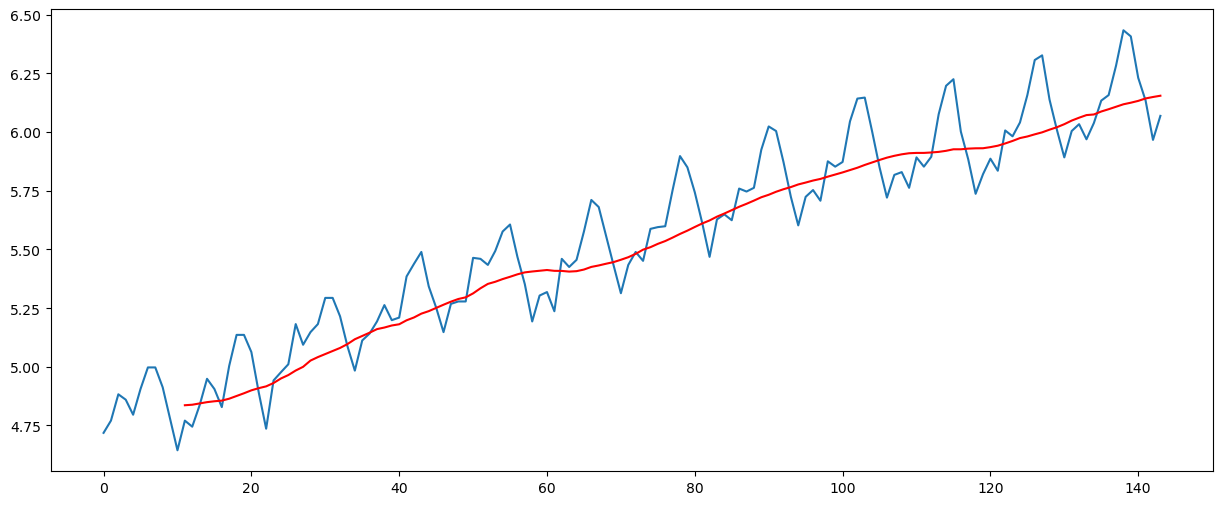

In [22]:
movingAverage=ts_log.rolling(window=12).mean()
movingSTD=ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage, color='Red')

In [23]:
ts_log_mv_diff=ts_log-movingAverage
ts_log_mv_diff.head(12)

ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

11   -0.065494
12   -0.093449
13   -0.007566
14    0.099416
15    0.052142
16   -0.027529
17    0.139881
18    0.260184
19    0.248635
20    0.162937
Name: Thousands of Passengers, dtype: float64

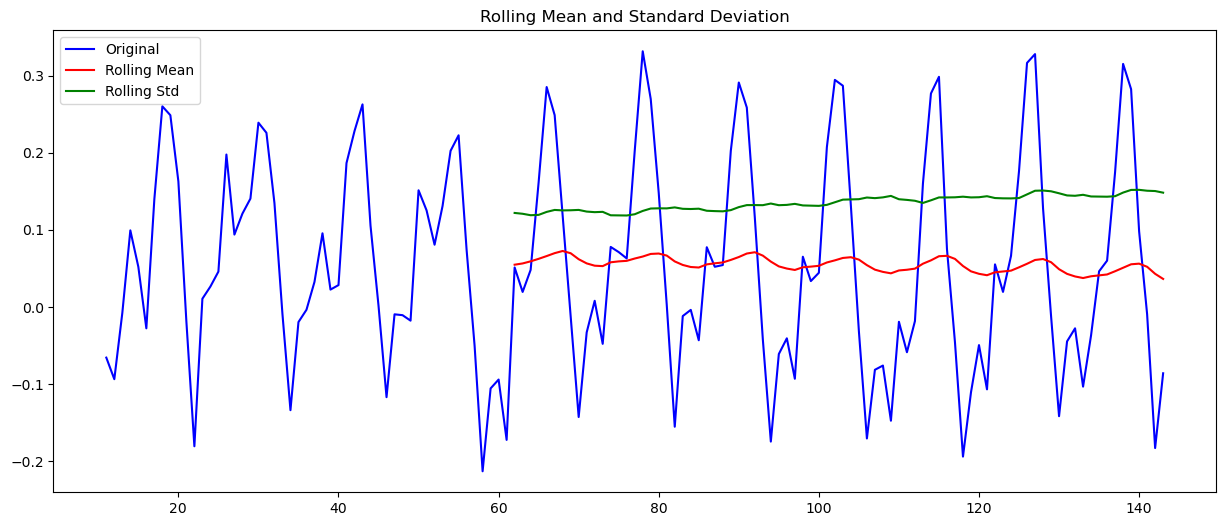

Result of Dickey-Fuler Test
Test Statistic              -3.162908
p-value                      0.022235
#Lags used                  13.000000
No of observations used    119.000000
critical value(1%)          -3.486535
critical value(5%)          -2.886151
critical value(10%)         -2.579896
dtype: float64


In [24]:
test_stationarity(ts_log_mv_diff)

In [ ]:
# the result of Dickey Fuler test shows that the test statistics is less than 1% of critical value 
# and shows that we are 99%confident that this series is stationary
# we can reject the null hypothesis